In [3]:
!pip install kagglehub[pandas-datasets]
!pip install scikit-learn
!pip install tensorflow

In [4]:
# 📦 Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer




#**Collecte de la données**
La base de données que nous allons utiliser vient de kaggle


In [5]:
# Download latest version
path = kagglehub.dataset_download("aradhanahirapara/farm-produce-data-80-years")
print("Path to dataset files:", path)


#Chargement des données
csv_path = os.path.join(path, "farm_production_dataset.csv")
df = pd.read_csv(csv_path)

100%|██████████| 158k/158k [00:00<00:00, 58.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aradhanahirapara/farm-produce-data-80-years/versions/2


# **Présentation de la dataframe(df)**

In [6]:

# Aperçu des données
df.head()

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


In [7]:
#Dimension de la dataframe(df) : Dataframe de df.shape[0] ligne et de df.shape[1] colonne

print(f"Le jeu de données contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
df.shape

Le jeu de données contient 10273 lignes et 9 colonnes.


(10273, 9)

In [8]:
#Affichage des champs ou colonne de la df sous forme d'une liste
list(df.columns)

['REF_DATE',
 'GEO',
 'Type of crop',
 'Average farm price (dollars per tonne)',
 'Average yield (kilograms per hectare)',
 'Production (metric tonnes)',
 'Seeded area (acres)',
 'Seeded area (hectares)',
 'Total farm value (dollars)']

In [9]:
# Type des colonnes de la dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10273 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REF_DATE                                10273 non-null  int64  
 1   GEO                                     10273 non-null  object 
 2   Type of crop                            10272 non-null  object 
 3   Average farm price (dollars per tonne)  10243 non-null  float64
 4   Average yield (kilograms per hectare)   10246 non-null  float64
 5   Production (metric tonnes)              10245 non-null  float64
 6   Seeded area (acres)                     9873 non-null   float64
 7   Seeded area (hectares)                  9847 non-null   float64
 8   Total farm value (dollars)              10273 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 722.4+ KB


In [10]:
df.isnull().sum()

,0
REF_DATE,0
GEO,0
Type of crop,1
Average farm price (dollars per tonne),30
Average yield (kilograms per hectare),27
Production (metric tonnes),28
Seeded area (acres),400
Seeded area (hectares),426
Total farm value (dollars),0


In [11]:
#statistiques descriptives des colonnes de la dataframe
df.describe().T.style.format({
    'REF_DATE': "{:.0f}",
    'Average farm price (dollars per tonne)': "{:.2f}",
    'Average yield (kilograms per hectare)': "{:.2f}",
    'Production (metric tonnes)': "{:,.0f}",
    'Seeded area (acres)': "{:,.0f}",
    'Seeded area (hectares)': "{:,.0f}",
    'Total farm value (dollars)': "${:,.0f}"
})

,count,mean,std,min,25%,50%,75%,max
REF_DATE,10273.000000,1947.661053,22.204519,1908.000000,1929.000000,1948.000000,1967.000000,1984.000000
Average farm price (dollars per tonne),10243.000000,59.633078,90.920549,0.000000,21.000000,43.000000,76.000000,6663.300000
Average yield (kilograms per hectare),10246.000000,3647.442319,8068.854966,0.000000,1055.000000,1485.000000,2363.750000,460305.000000
Production (metric tonnes),10245.000000,1010886.960859,3044680.936535,0.000000,8300.000000,71950.000000,548000.000000,133678950.000000
Seeded area (acres),9873.000000,1310066.821230,4881387.286622,0.000000,10500.000000,83000.000000,583100.000000,317203482.000000
Seeded area (hectares),9847.000000,531623.078298,1978042.634945,0.000000,4350.000000,34000.000000,238900.000000,128389050.000000
Total farm value (dollars),10273.000000,54900.843960,250241.346347,0.000000,369.000000,3006.000000,19541.000000,4654194.000000


In [12]:
#Secteurs ou provinces étudiés
df.GEO.unique()

array(['AB', 'BC', 'CA', 'MA', 'MP', 'NB', 'NS', 'ON', 'PP', 'PEI', 'QU',
       'SK', ' ', 'NL'], dtype=object)

In [13]:
df['GEO'].value_counts()

,count
GEO,
CA,1305
ON,1169
MA,1104
AB,1045
SK,957
QU,952
PP,845
BC,714
NS,630


In [14]:
df['Type of crop'].nunique()

23

In [15]:
list(df['Type of crop'].unique())

['Barley',
 'Flaxseed',
 'Oats',
 'Rye, all',
 'Sugar beets',
 'Tame hay',
 'Wheat, all',
 'Beans, all dry (white and coloured)',
 'Buckwheat',
 'Corn for grain',
 'Corn for silage',
 'Mixed grains',
 'Peas, dry',
 'Wheat, spring',
 'Wheat, winter remaining',
 'Rye, fall remaining',
 'Rye, spring',
 'Soybeans',
 'Sunflower seed',
 'Canola (rapeseed)',
 'Mustard seed',
 nan,
 'Wheat, durum',
 'Lentils']

In [16]:
df['Type of crop'].value_counts()

,count
Type of crop,
Barley,924
Oats,924
"Wheat, all",924
Tame hay,924
Mixed grains,914
Corn for silage,832
"Rye, all",718
"Peas, dry",655
Flaxseed,572


In [17]:
# Affichage de la période couverte par les données (de la première à la dernière année)
print("Période couverte :", "De ", df.REF_DATE.min(), "à", df.REF_DATE.max(), "\n\t\t  ", len(df), "enregistrements de", len(df.GEO.unique()), "provinces")

Période couverte : De  1908 à 1984 
		   10273 enregistrements de 14 provinces


In [18]:
colonnes_numeriques = list(df.select_dtypes(include='number').columns)
print(colonnes_numeriques)

['REF_DATE', 'Average farm price (dollars per tonne)', 'Average yield (kilograms per hectare)', 'Production (metric tonnes)', 'Seeded area (acres)', 'Seeded area (hectares)', 'Total farm value (dollars)']


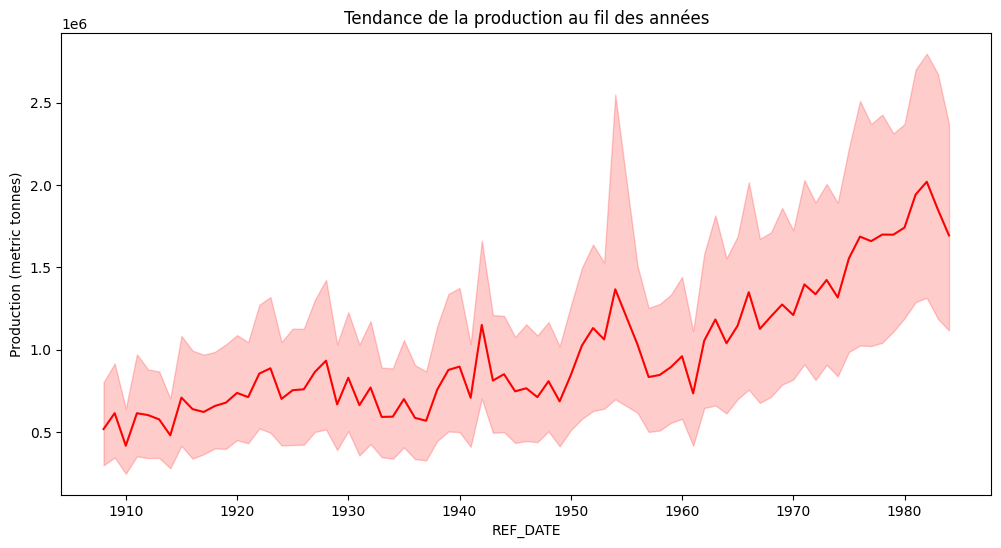

In [19]:
# Tendance de la production selon les années
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='REF_DATE', y='Production (metric tonnes)' , color='red')
plt.title("Tendance de la production au fil des années")
plt.show()

# **Préparation des données**

**Changement du type object en catégorie**

In [20]:
df_clean = df.copy()
df_clean['REF_DATE'] = pd.to_datetime(df_clean['REF_DATE'], format='%Y')

for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype('category')

In [21]:
#nettoyage
df_clean = df_clean.dropna()

In [22]:
#gestion des valeurs manquantes
# Remplacer les cellules contenant uniquement des espaces (ou vides) par le mode

for col in df_clean.select_dtypes(include='object'):
    mode_val = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_val)
    df_clean[col] = df_clean[col].replace(' ', mode_val)
    df_clean[col] = df_clean[col].replace('', mode_val)


# Remplir les valeurs manquantes par la moyenne de chaque colonne
for col in df_clean.select_dtypes(include='number'):
    moyenne = df_clean[col].mean()
    df_clean[col].fillna(moyenne, inplace=True)

/tmp/ipython-input-22-2890197922.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(moyenne, inplace=True)


Remplacement ' ' par le mode de GEO

In [23]:


# Fonction pour limiter les valeurs aberrantes d'une colonne à l'intérieur de bornes raisonnables
def keep_non_outliers(df_clean, column):
    # Calcul du premier (Q1) et du troisième quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calcul de l'écart interquartile (IQR)
    IQR = Q3 - Q1

    # Définition des bornes inférieure et supérieure pour détecter les valeurs extrêmes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Limitation des valeurs : les valeurs trop petites ou trop grandes sont "coupées" à ces bornes
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df  # On retourne le DataFrame modifié

# Création d'une version nettoyée où les valeurs extrêmes sont limitées
df_clean = df.copy()

# Application de la fonction à toutes les colonnes numériques
for column in colonnes_numeriques:
    df_clean = keep_non_outliers(df_clean, column)


In [24]:
df_clean.shape

(10273, 9)

In [25]:
df_clean.isnull().sum()

,0
REF_DATE,0
GEO,0
Type of crop,1
Average farm price (dollars per tonne),30
Average yield (kilograms per hectare),27
Production (metric tonnes),28
Seeded area (acres),400
Seeded area (hectares),426
Total farm value (dollars),0


# **Analyse des performances agricoles par province et par culture.**

# Création de nouveaux indicateurs de rentabilité

In [26]:


# Supprimer les lignes avec NaN dans les colonnes critiques
df_clean.dropna(subset=[
    'Production (metric tonnes)',
    'Seeded area (hectares)',
    'Total farm value (dollars)'
], inplace=True)

# Calcul des indicateurs de performance

# Valeur agricole par hectare
df_clean['value_per_hectare'] = df['Total farm value (dollars)'] / df['Seeded area (hectares)']
df_clean['value_per_tonne'] = df['Total farm value (dollars)'] / df['Production (metric tonnes)']


df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['value_per_hectare', 'value_per_tonne'], inplace=True)


# Revenu estimé (production × prix moyen)
#df_clean['Revenu_estimé'] = df_clean['Production (metric tonnes)'] * df_clean['Average farm price (dollars per tonne)']


In [27]:
df_clean.head()

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars),value_per_hectare,value_per_tonne
0,1908,AB,Barley,15.00,1585.000,84000.0,129800.0,53000.0,1296,0.024453,0.015429
1,1908,AB,Flaxseed,29.00,950.000,1900.0,5900.0,2000.0,56,0.028000,0.029474
2,1908,AB,Oats,18.00,1675.000,352000.0,519400.0,210000.0,6316,0.030076,0.017943
3,1908,AB,"Rye, all",23.00,1665.000,5000.0,6500.0,3000.0,117,0.039000,0.023400
4,1908,AB,Sugar beets,0.55,4326.875,38100.0,5200.0,2100.0,208,0.099048,0.005459


In [28]:
# Moyenne de rentabilité par province
rentabilite_par_province = df_clean.groupby("GEO")[['value_per_hectare', 'value_per_tonne']].mean().sort_values(
    by="value_per_hectare", ascending = False
)
print(rentabilite_par_province)

     value_per_hectare  value_per_tonne
GEO                                    
NL            0.795156         0.199488
BC            0.145719         0.057360
QU            0.143679         0.065181
AB            0.135219         0.056768
NS            0.130419         0.057614
MP            0.127781         0.052370
CA            0.121795         0.062049
PP            0.120809         0.042548
ON            0.118409         0.057976
MA            0.109825         0.060322
PEI           0.109354         0.044695
NB            0.105256         0.053181
SK            0.074818         0.056267
              0.063889         0.034328


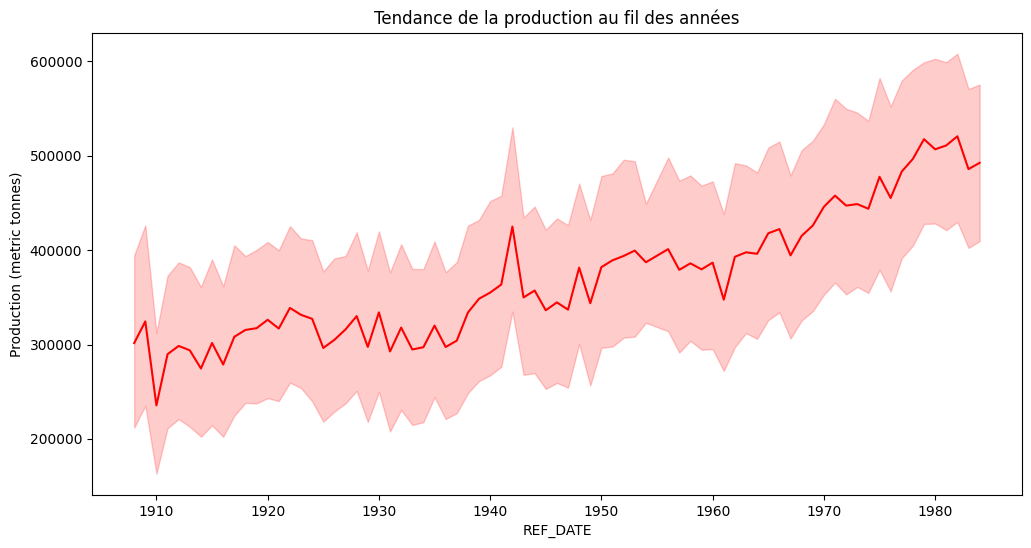

In [29]:
# Tendance de la production selon les années
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x='REF_DATE', y='Production (metric tonnes)' , color='red')
plt.title("Tendance de la production au fil des années")
plt.show()

In [30]:
grouped = df_clean.groupby(['GEO', 'Type of crop']).agg({
    'Production (metric tonnes)': 'sum',
    'Seeded area (hectares)': 'sum',
    'Average yield (kilograms per hectare)': 'mean',
    'Average farm price (dollars per tonne)': 'mean',
    'Total farm value (dollars)': 'sum',
    'value_per_hectare': 'mean',
    'value_per_tonne': 'mean'
}).reset_index()


In [31]:
grouped.head()

,GEO,Type of crop,Production (metric tonnes),Seeded area (hectares),Average yield (kilograms per hectare),Average farm price (dollars per tonne),Total farm value (dollars),value_per_hectare,value_per_tonne
0,,Barley,6700.0,3600.0,1860.000000,34.000000,230,0.063889,0.034328
1,AB,Barley,66005250.0,33185900.0,1640.389610,41.233766,2183355,0.055857,0.029042
2,AB,"Beans, all dry (white and coloured)",5750.0,5700.0,1000.652174,78.282609,545,0.083678,0.081090
3,AB,Buckwheat,14000.0,15900.0,848.333333,75.000000,1016,0.063378,0.075063
4,AB,Canola (rapeseed),14313850.0,10332825.0,970.333333,118.966667,890044,0.082856,0.078835


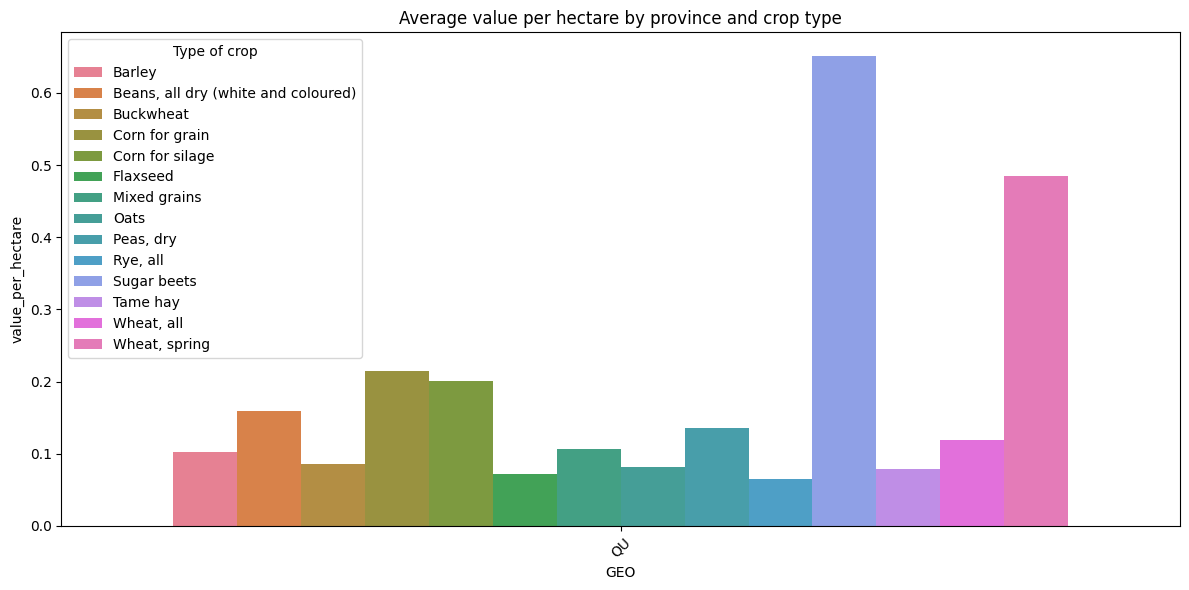

In [32]:
#Valeur de l'hectare par province, le cas du Québec
plt.figure(figsize=(12, 6))
sns.barplot(data = grouped[grouped['GEO'] == 'QU'], x='GEO', y='value_per_hectare', hue='Type of crop')
plt.title('Average value per hectare by province and crop type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-33-3187020983.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipython-input-33-3187020983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


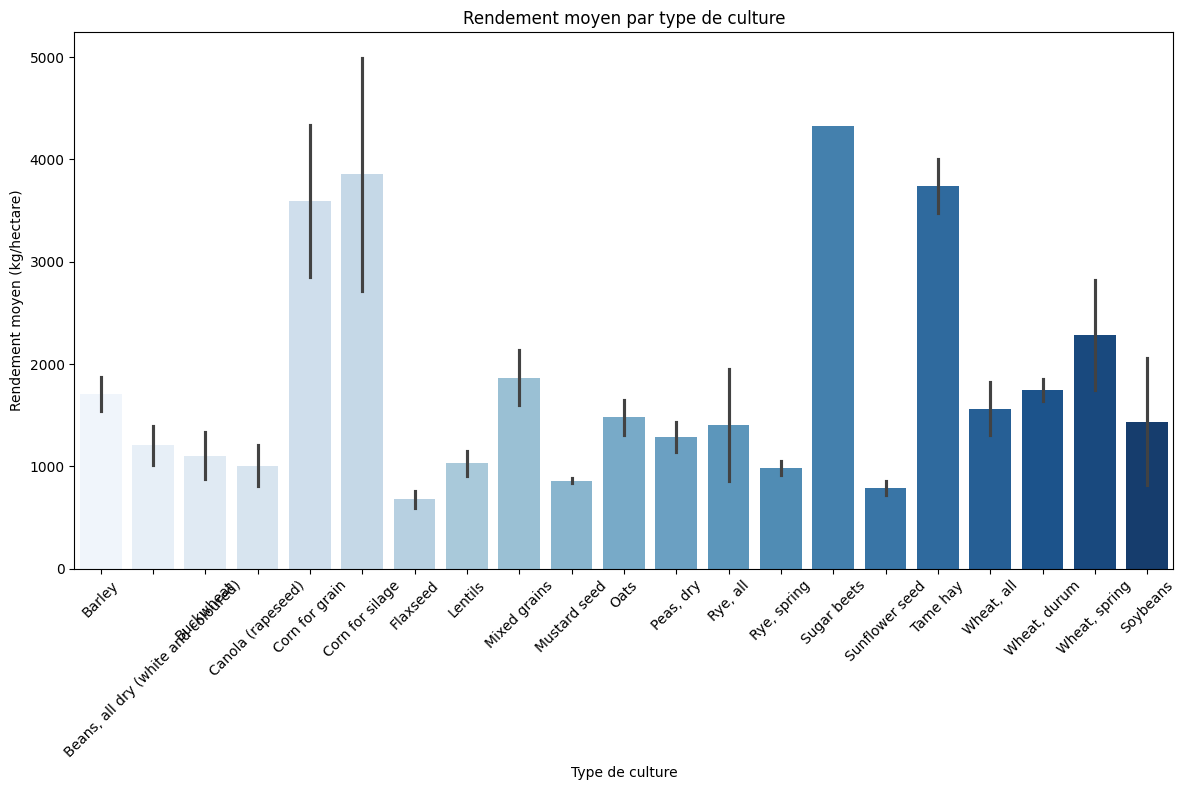

In [33]:
#diagramme à barres du rendement moyen par type de culture

plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped,
    x='Type of crop',
    y='Average yield (kilograms per hectare)',
    estimator='mean',
    ci='sd',  # Intervalle de confiance (écart type ici)
    palette='Blues'
)
plt.title('Rendement moyen par type de culture')
plt.xlabel('Type de culture')
plt.ylabel('Rendement moyen (kg/hectare)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

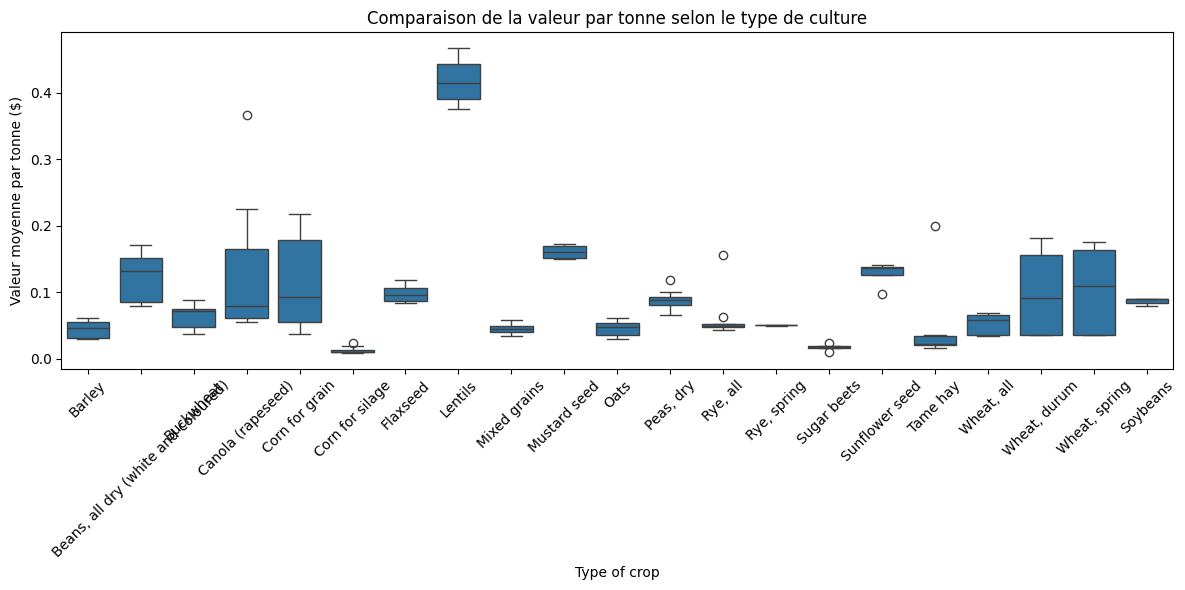

In [34]:
#Comparaison de la rentabilité (valeur par tonne) selon le type de culture
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped, x='Type of crop', y='value_per_tonne')
plt.title('Comparaison de la valeur par tonne selon le type de culture')
plt.ylabel('Valeur moyenne par tonne ($)')
plt.xlabel('Type of crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






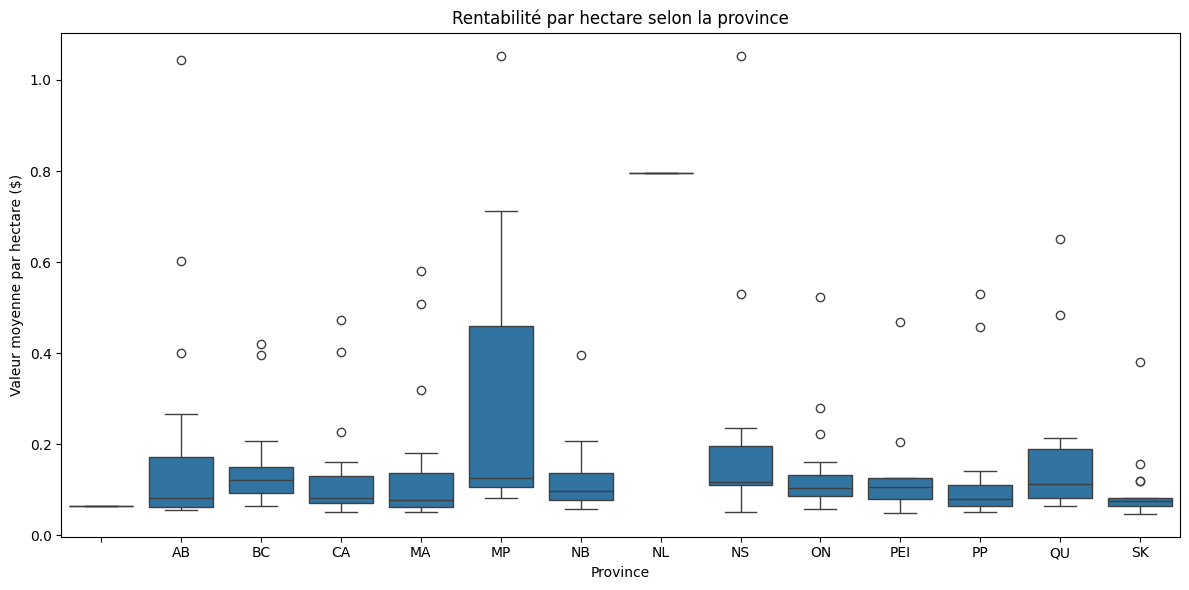

In [35]:
#Comparaison de la rentabilité par hectare selon la province.
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped, x='GEO', y='value_per_hectare')
plt.title('Rentabilité par hectare selon la province')
plt.ylabel('Valeur moyenne par hectare ($)')
plt.xlabel('Province')
plt.tight_layout()
plt.show()


/tmp/ipython-input-36-979506342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


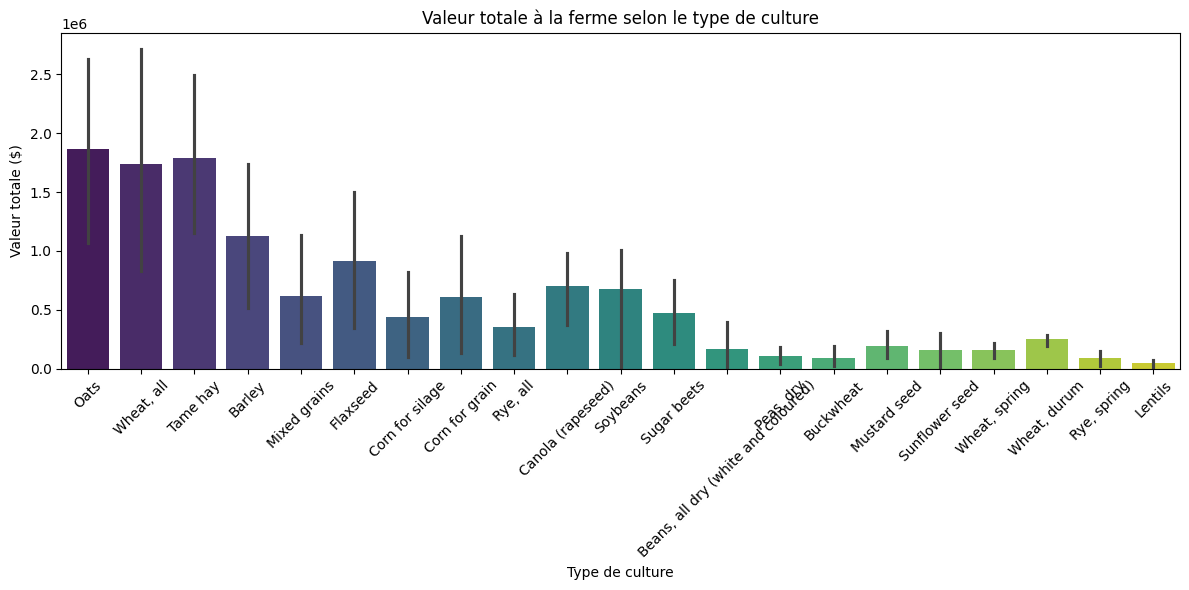

In [36]:
#la valeur totale à la ferme (Total farm value (dollars)) pour chaque type de culture (Type of crop).
# Taille de la figure
plt.figure(figsize=(12, 6))

# Création du barplot
sns.barplot(
    data=grouped.sort_values(by='Total farm value (dollars)', ascending=False),
    x='Type of crop',
    y='Total farm value (dollars)',
    palette='viridis'
)

# Titres et axes
plt.title('Valeur totale à la ferme selon le type de culture')
plt.xlabel('Type de culture')
plt.ylabel('Valeur totale ($)')
plt.xticks(rotation=45)

# Affichage
plt.tight_layout()
plt.show()



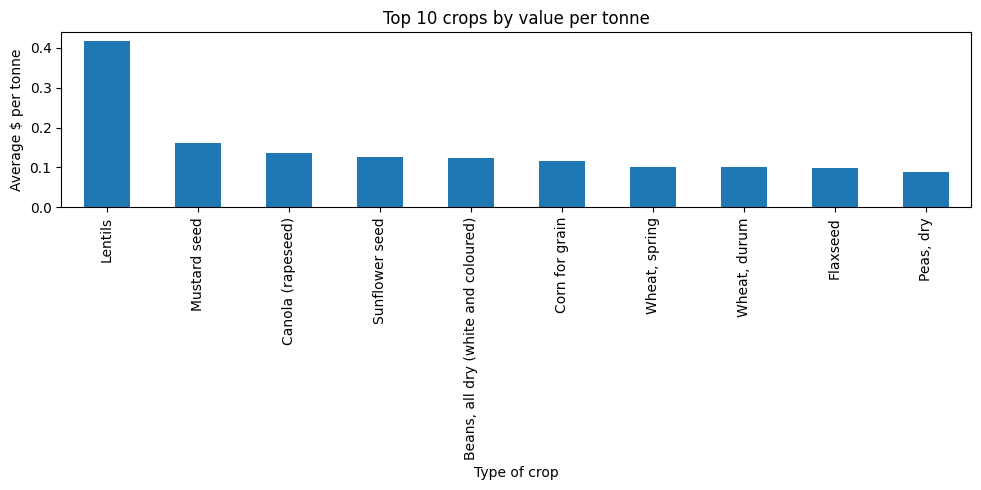

In [37]:
#Top 10 des cultures selon la valeur moyenne par tonne
top_crops = grouped.groupby('Type of crop')['value_per_tonne'].mean().sort_values(ascending=False).head(10)
top_crops.plot(kind='bar', figsize=(10, 5), title='Top 10 crops by value per tonne')
plt.ylabel('Average $ per tonne')
plt.tight_layout()
plt.show()

In [38]:
df_clean.head()

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars),value_per_hectare,value_per_tonne
0,1908,AB,Barley,15.00,1585.000,84000.0,129800.0,53000.0,1296,0.024453,0.015429
1,1908,AB,Flaxseed,29.00,950.000,1900.0,5900.0,2000.0,56,0.028000,0.029474
2,1908,AB,Oats,18.00,1675.000,352000.0,519400.0,210000.0,6316,0.030076,0.017943
3,1908,AB,"Rye, all",23.00,1665.000,5000.0,6500.0,3000.0,117,0.039000,0.023400
4,1908,AB,Sugar beets,0.55,4326.875,38100.0,5200.0,2100.0,208,0.099048,0.005459


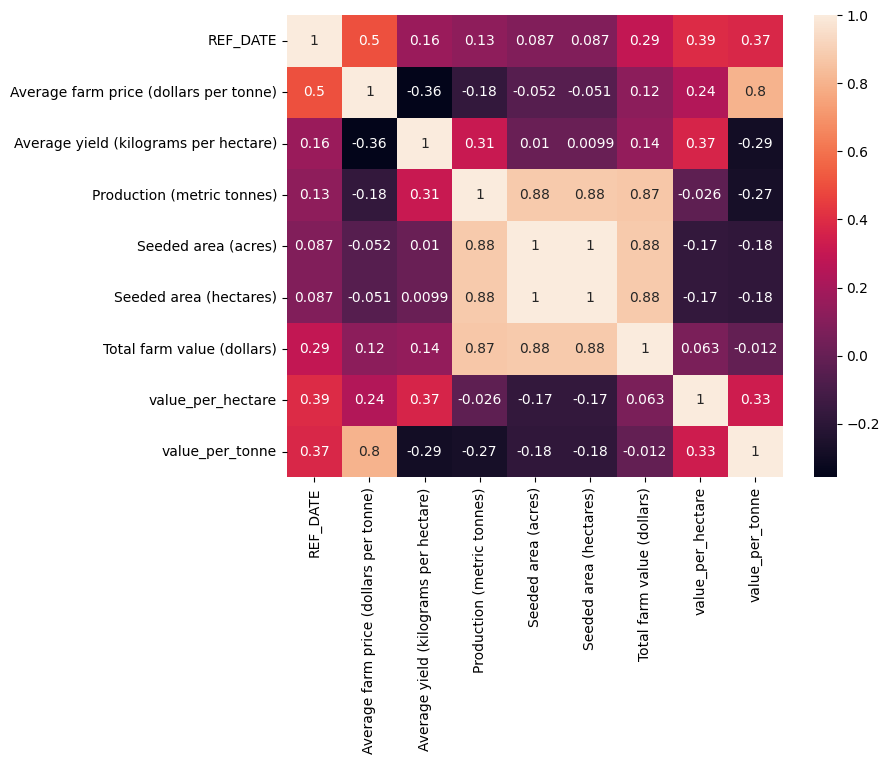

In [39]:
#Visualisation des corrélations
colonnes_numeriques = df_clean.select_dtypes(include='number').columns
out_correlation = df_clean[colonnes_numeriques].corr()
plt.figure(figsize=(8,6))
sns.heatmap(out_correlation, annot=True)
plt.show()

# Estimation de la rentabilité

In [40]:
#Comparaison par type de culture
df_clean.groupby("Type of crop")[['value_per_hectare', 'value_per_tonne']].mean().sort_values(by='value_per_hectare', ascending=False)


,value_per_hectare,value_per_tonne
Type of crop,,
Sugar beets,0.509570,0.017295
Lentils,0.422628,0.418213
Corn for grain,0.191892,0.055228
Corn for silage,0.189375,0.011893
"Wheat, spring",0.189292,0.081570
"Wheat, durum",0.187124,0.100037
"Beans, all dry (white and coloured)",0.177018,0.140039
Soybeans,0.156186,0.088835
Mustard seed,0.144646,0.159981


In [41]:
# Comparaison par province (GEO)
df_clean.groupby("GEO")[['value_per_hectare', 'value_per_tonne']].mean().sort_values(by='value_per_hectare', ascending=False)


,value_per_hectare,value_per_tonne
GEO,,
NL,0.795156,0.199488
BC,0.145719,0.057360
QU,0.143679,0.065181
AB,0.135219,0.056768
NS,0.130419,0.057614
MP,0.127781,0.052370
CA,0.121795,0.062049
PP,0.120809,0.042548
ON,0.118409,0.057976


In [42]:
#Croisement par province & culture
df_clean.groupby(["GEO", "Type of crop"])[['value_per_hectare']].mean().unstack().fillna(0)

value_per_hectare                                                \
Type of crop            Barley Beans, all dry (white and coloured) Buckwheat   
GEO                                                                            
                      0.063889                            0.000000  0.000000   
AB                    0.055857                            0.083678  0.063378   
BC                    0.093295                            0.129068  0.000000   
CA                    0.071205                            0.227243  0.071595   
MA                    0.053313                            0.000000  0.065998   
MP                    0.110209                            0.000000  0.000000   
NB                    0.100889                            0.154833  0.069800   
NL                    0.000000                            0.000000  0.000000   
NS                    0.118889                            0.181622  0.051174   
ON                    0.102117                            0.221955  0.057836   
PEI                   0.108557                            0.000000  0.049745   
PP                    0.064991                            0.000000  0.000000   
QU                    0.103072                            0.159359  0.085262   
SK                    0.054488                            0.078135  0.064600   

                                                                         \
Type of crop Canola (rapeseed) Corn for grain Corn for silage  Flaxseed   
GEO                                                                       
                      0.000000       0.000000        0.000000  0.000000   
AB                    0.082856       1.044789        0.204276  0.095234   
BC                    0.206329       0.000000        0.420104  0.065265   
CA                    0.066079       0.115789        0.115296  0.057865   
MA                    0.103365       0.180598        0.124512  0.068184   
MP                    0.000000       1.053182        0.712969  0.000000   
NB                    0.000000       0.000000        0.207063  0.000000   
NL                    0.000000       0.000000        0.000000  0.000000   
NS                    0.000000       1.053182        0.235793  0.000000   
ON                    0.524446       0.119479        0.123615  0.074350   
PEI                   0.000000       0.000000        0.204188  0.000000   
PP                    0.066069       0.456522        0.141316  0.057417   
QU                    0.000000       0.214881        0.200909  0.072443   
SK                    0.070247       0.000000        0.073458  0.077972   

                                                  ...                      \
Type of crop   Lentils Mixed grains Mustard seed  ... Peas, dry  Rye, all   
GEO                                               ...                       
              0.000000     0.000000     0.000000  ...  0.000000  0.000000   
AB            0.399813     0.078368     0.142176  ...  0.160248  0.063317   
BC            0.000000     0.109863     0.000000  ...  0.131409  0.090918   
CA            0.401787     0.067514     0.133281  ...  0.125780  0.052063   
MA            0.508990     0.073470     0.150321  ...  0.122245  0.063877   
MP            0.000000     0.107261     0.000000  ...  0.000000  0.458891   
NB            0.000000     0.097140     0.000000  ...  0.088952  0.056955   
NL            0.000000     0.000000     0.000000  ...  0.000000  0.000000   
NS            0.000000     0.116525     0.000000  ...  0.115594  0.116564   
ON            0.000000     0.088095     0.000000  ...  0.092149  0.075910   
PEI           0.000000     0.106793     0.000000  ...  0.080773  0.000000   
PP            0.000000     0.072541     0.000000  ...  0.121150  0.051835   
QU            0.000000     0.107225     0.000000  ...  0.135090  0.064481   
SK            0.379923     0.068856     0.156198  ...  0.118744  0.052860   

                                                                  

# Visualisation


/tmp/ipython-input-43-2727453181.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_crop_hectare.values, y=top_10_crop_hectare.index, palette='crest')


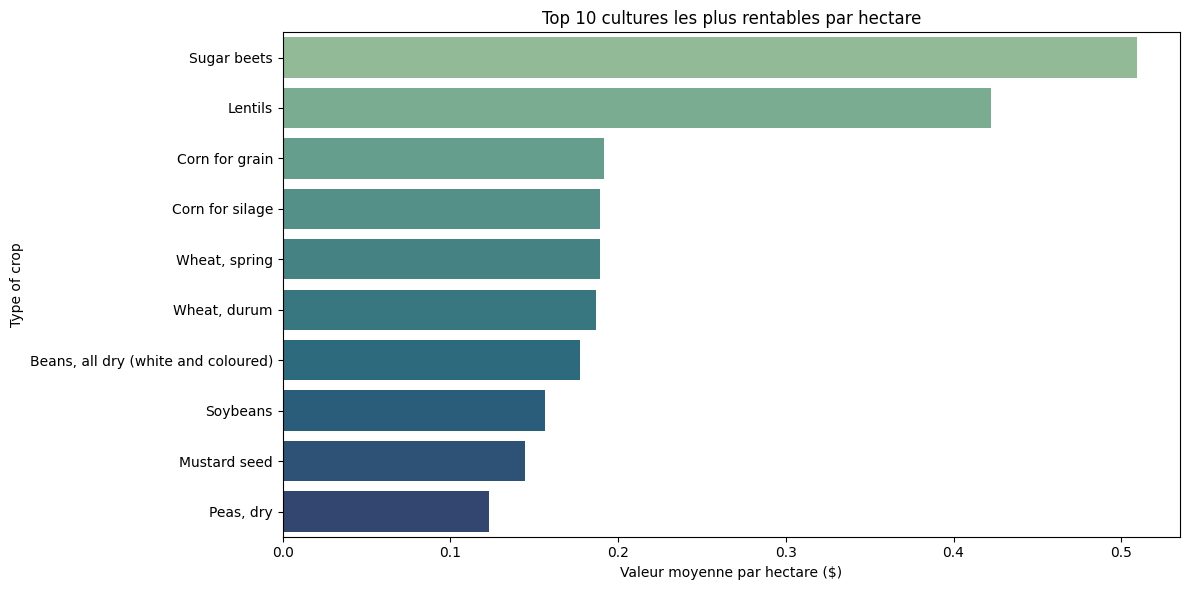

In [43]:
#Top 10 cultures les plus rentables par hectare
top_10_crop_hectare = (
    df_clean.groupby('Type of crop')['value_per_hectare']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_crop_hectare.values, y=top_10_crop_hectare.index, palette='crest')
plt.xlabel("Valeur moyenne par hectare ($)")
plt.title("Top 10 cultures les plus rentables par hectare")
plt.tight_layout()
plt.show()



/tmp/ipython-input-44-602542306.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_value_geo.values, y=avg_value_geo.index, palette='viridis')


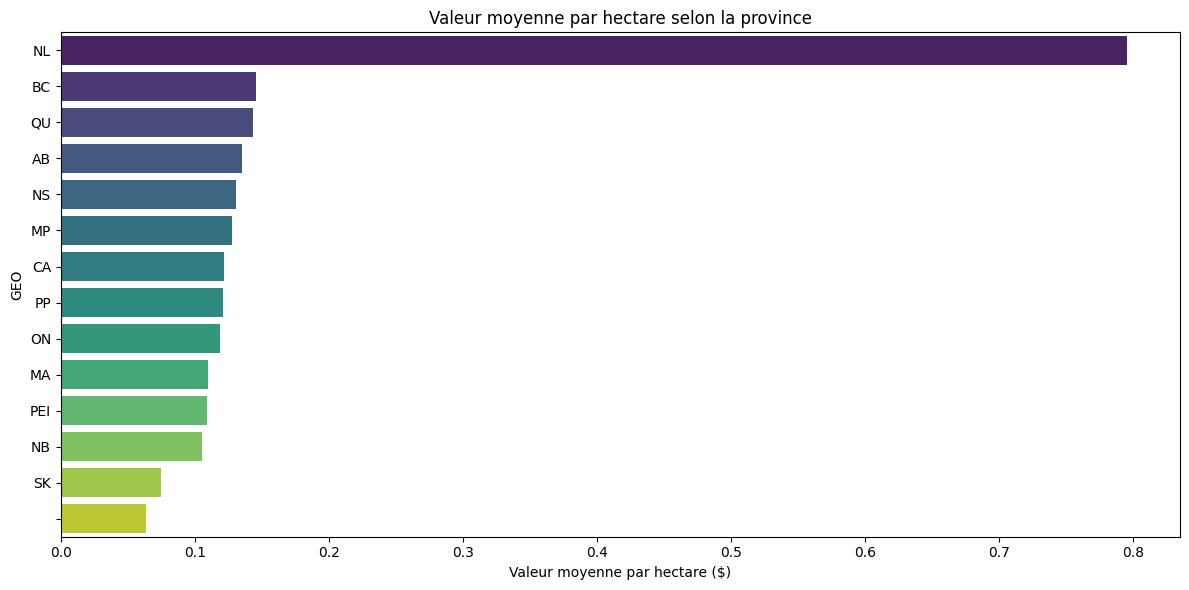

In [44]:
# Valeur moyenne par hectare selon la province (GEO)

avg_value_geo = (
    df_clean.groupby('GEO')['value_per_hectare']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_value_geo.values, y=avg_value_geo.index, palette='viridis')
plt.xlabel("Valeur moyenne par hectare ($)")
plt.title("Valeur moyenne par hectare selon la province")
plt.tight_layout()
plt.show()

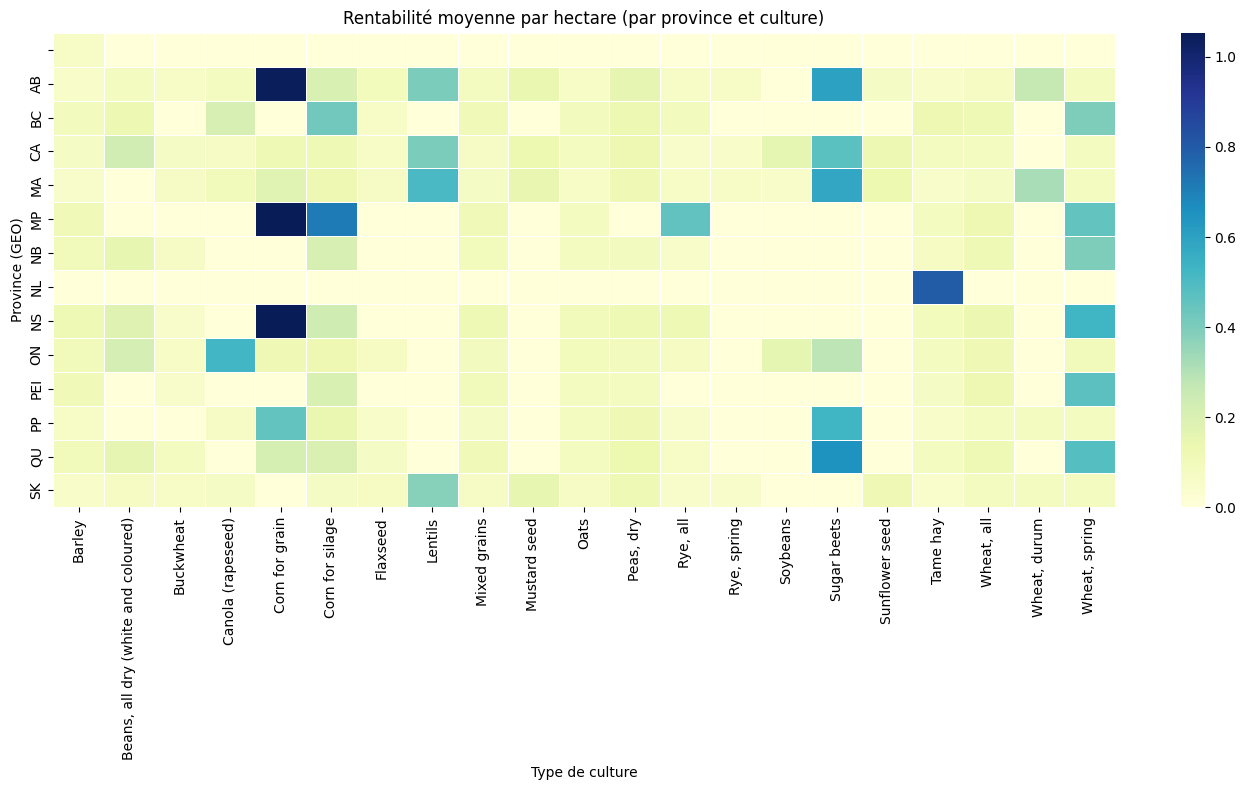

In [45]:
#Heatmap de la rentabilité par province et type de culture

pivot_table = df_clean.pivot_table(
    values='value_per_hectare',
    index='GEO',
    columns='Type of crop',
    aggfunc='mean'
).fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title("Rentabilité moyenne par hectare (par province et culture)")
plt.xlabel("Type de culture")
plt.ylabel("Province (GEO)")
plt.tight_layout()
plt.show()

# **Prédiction de la production (en tonnes métriques).**

In [46]:
# Préparation des données
# Supposons que df_clean soit déjà nettoyé et prêt
df_model = df_clean.copy()

# Définition de la variable cible (production) et des variables explicatives
target = 'Production (metric tonnes)'
X = df_model.drop(columns=[target])
y = df_model[target]

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Standardisation des variables numériques
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

#  Séparation en ensemble d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [47]:
# Entraînement du modèle Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,          # nombre d'arbres
    random_state=42,           # pour la reproductibilité
    n_jobs=-1,                 # utiliser tous les cœurs du processeur
    oob_score=True             # validation croisée automatique (out-of-bag)
)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [48]:

# Évaluation du modèle
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Évaluation du modèle :")
print(f"Erreur absolue moyenne (MAE) : {mae:.2f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.4f}")
print(f"Score OOB (validation croisée) : {rf_model.oob_score_:.4f}")

#Importance des variables
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n Les principales variables expliquant la production :")
print(feature_importance_df.head(10))


Évaluation du modèle :
Erreur absolue moyenne (MAE) : 7828.33
Erreur quadratique moyenne (MSE) : 608590540.63
Coefficient de détermination (R²) : 0.9976
Score OOB (validation croisée) : 0.9982

 Les principales variables expliquant la production :
                                  Variable  Importance
3                      Seeded area (acres)    0.361373
4                   Seeded area (hectares)    0.355641
5               Total farm value (dollars)    0.106768
2    Average yield (kilograms per hectare)    0.081966
7                          value_per_tonne    0.059389
25            Type of crop_Corn for silage    0.013864
1   Average farm price (dollars per tonne)    0.008991
6                        value_per_hectare    0.004691
37                   Type of crop_Tame hay    0.003075
10                                  GEO_CA    0.001376


# précision du modèle

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"R² moyen : {scores.mean():.4f} ± {scores.std():.4f}")

R² moyen : 0.9947 ± 0.0041


Donc le modèle de forêt aléatoire est performant et bien généralisé :
- Pas de surapprentissage détecté
- Pas besoin de régularisation ou simplification immédiate

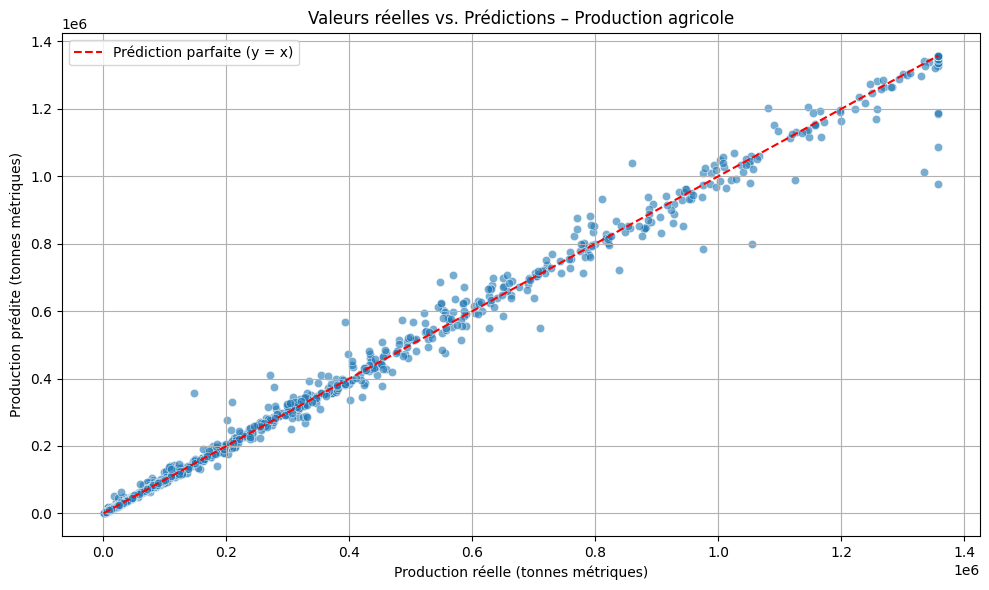

In [57]:
#Prédictions par rapport aux Valeurs réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Prédiction parfaite (y = x)')
plt.title("Valeurs réelles vs. Prédictions – Production agricole")
plt.xlabel("Production réelle (tonnes métriques)")
plt.ylabel("Production prédite (tonnes métriques)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Les points proches de la ligne rouge indiquent une bonne prédiction.

# **Importance des variables (Top 20)**

/tmp/ipython-input-51-862248092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(top_n), y='Variable', x='Importance', palette='viridis')


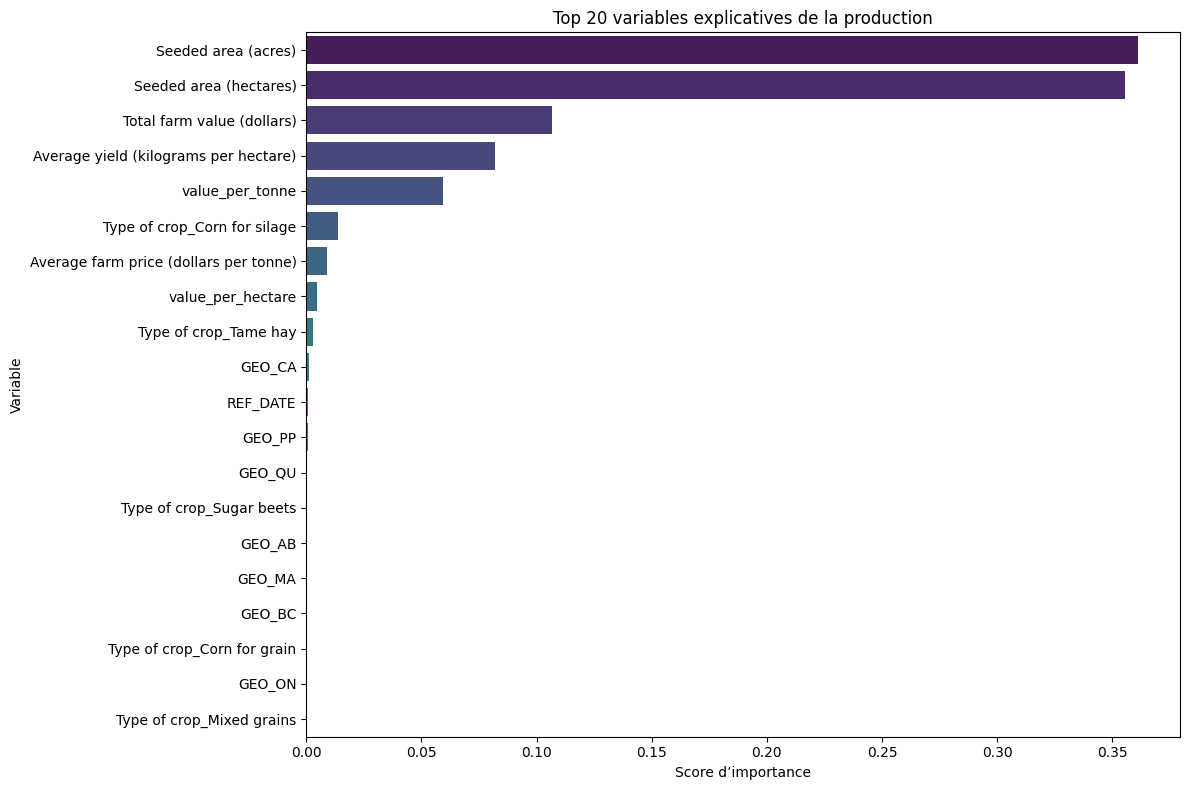

In [51]:
top_n = 20
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(top_n), y='Variable', x='Importance', palette='viridis')
plt.title(f"Top {top_n} variables explicatives de la production")
plt.xlabel("Score d’importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


ici, on voit les variables qui ont le plus influencé les prédictions.

# Distribution des erreurs de prédiction
Elle permet de savoir si le modèle a tendance à sous-estimer ou surestimer.

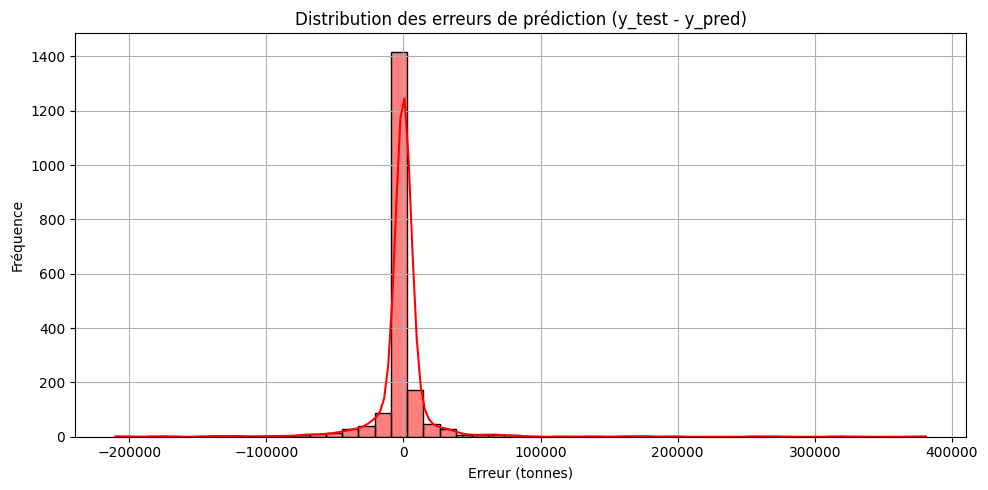

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(y_test - y_pred, bins=50, kde=True, color='red')
plt.title("Distribution des erreurs de prédiction (y_test - y_pred)")
plt.xlabel("Erreur (tonnes)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# Sauvegarde de la DataFrame df_clean dans un fichier CSV
rf_model.to_csv('model_scores.csv', index=False)
from google.colab import files

# Téléchargement du fichier CSV
files.download('model_scores.csv')


AttributeError: 'RandomForestRegressor' object has no attribute 'to_csv'